In [1]:
from scipy.optimize import curve_fit
from cycler import cycler
import glob, os
from astropy.io import fits
from scipy.ndimage import label, center_of_mass
from matplotlib.patches import Circle
from tools import *

# Let's try to understand the example code first

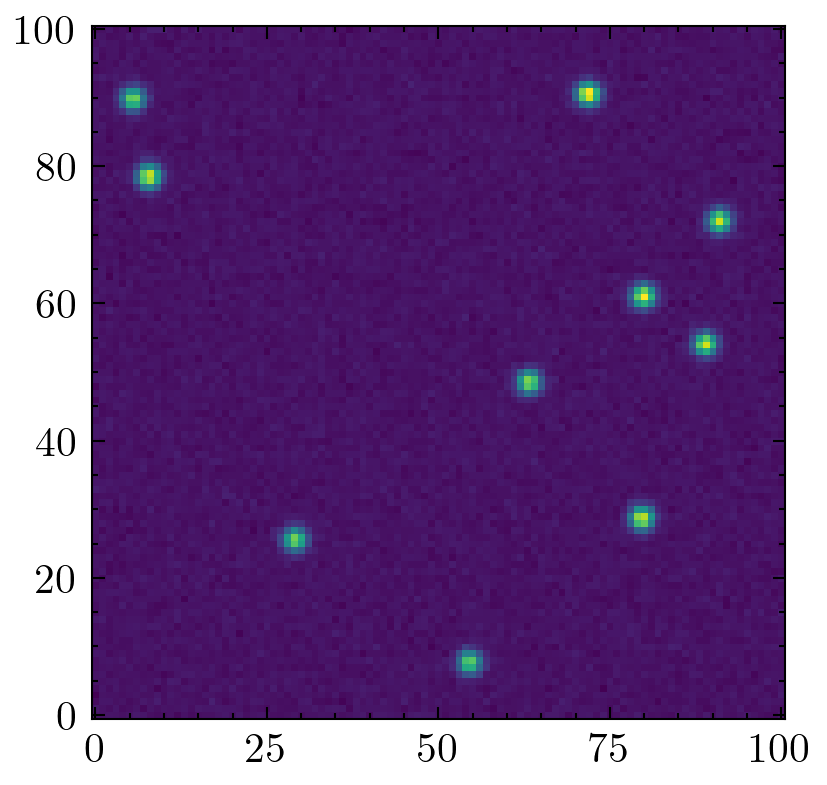

In [12]:
from photutils.datasets import make_noise_image
from photutils.psf import CircularGaussianPRF, make_psf_model_image

# Generate some example image

psf_model = CircularGaussianPRF(flux=1, fwhm=2.7)

psf_shape = (9, 9)
n_sources = 10
shape = (101, 101)
data, true_params = make_psf_model_image(shape, psf_model, n_sources,
                                         model_shape=psf_shape,
                                         flux=(500, 700),
                                         min_separation=10, seed=0)
noise = make_noise_image(data.shape, mean=0, stddev=1, seed=0)
data += noise
error = np.abs(noise)

plt.figure(dpi=300)
plt.imshow(data, origin='lower')
plt.show()

In [13]:
# Need to perform background substraction
# here it's alr done

from photutils.detection import DAOStarFinder
from photutils.psf import PSFPhotometry
psf_model = CircularGaussianPRF(flux=1, fwhm=2.7)
fit_shape = (5, 5)
finder = DAOStarFinder(6.0, 2.0)
psfphot = PSFPhotometry(psf_model, fit_shape, finder=finder,
                        aperture_radius=4)

In [14]:
phot = psfphot(data, error=error)
